In [402]:
import pandas as pd
import numpy as np

# package for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# package for data science
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import classification_report

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# exporting model
import joblib

# pandas cofiguration
pd.options.display.max_columns=50

In [403]:
df_weather = pd.read_parquet('/content/drive/MyDrive/Mini DS/weather_data_final.parquet')

df_weather.sample(5)

,id,main,description,icon,dt,main.temp,main.feels_like,main.humidity,main.temp_min,main.temp_max,wind.speed,wind.deg,wind.gust,clouds.all,rain.1h
1817,803,Clouds,broken clouds,04d,2022-09-14 07:00:00+00:00,305.07,310.04,60,305.07,305.07,1.53,358,2.22,70,NaN
972,804,Clouds,overcast clouds,04d,2022-08-10 07:00:00+00:00,304.74,307.96,55,304.74,304.74,2.11,359,1.90,97,NaN
444,803,Clouds,broken clouds,04d,2022-07-19 10:00:00+00:00,304.16,308.02,60,303.41,304.16,1.87,23,2.79,57,NaN
1899,803,Clouds,broken clouds,04n,2022-09-17 16:00:00+00:00,295.67,296.43,94,295.27,299.76,1.27,161,1.42,68,NaN
1094,804,Clouds,overcast clouds,04d,2022-08-15 08:00:00+00:00,301.79,305.11,70,301.79,301.79,0.21,145,0.86,100,NaN


In [404]:
df = pd.read_parquet('/content/drive/MyDrive/Mini DS/interim_data.parquet')

df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday
23100,2022-07-16 11:00:00,32.76,KOTA DEPOK,Prigi,2,380.0,60.0,10.440000,1,34125161,2022-07-16,2.0,"LINESTRING (106.762213 -6.432665, 106.762097 -...",Saturday,11,5,1,7,0
16016,2022-07-13 14:00:00,32.76,KOTA DEPOK,Muchtar Raya,1,1662.0,110.0,21.040000,2,33910132,2022-07-13,1.0,"LINESTRING (106.748021 -6.405747, 106.748448 -...",Wednesday,14,2,0,7,0
88716,2022-08-11 06:00:00,32.76,KOTA DEPOK,Nusantara,2,713.0,68.0,18.340000,3,35786906,2022-08-11,2.0,"MULTILINESTRING ((106.814446 -6.390664, 106.81...",Thursday,6,3,0,8,0
103373,2022-08-16 14:00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.000000,236,36105564,2022-08-16,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",Tuesday,14,1,0,8,0
58979,2022-07-29 17:00:00,32.76,KOTA DEPOK,N6 Jalan Raya Parung-Bogor,2,1668.5,88.5,25.439999,48,34962942,2022-07-29,2.0,"MULTILINESTRING ((106.733841 -6.416633, 106.73...",Friday,17,4,0,7,0


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154459 entries, 0 to 154458
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       154459 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  154459 non-null  float64       
 2   kemendagri_kabupaten_nama  154459 non-null  object        
 3   street                     154459 non-null  object        
 4   level                      154459 non-null  int64         
 5   median_length              154459 non-null  float64       
 6   median_delay               154459 non-null  float64       
 7   median_speed_kmh           154459 non-null  float64       
 8   total_records              154459 non-null  int64         
 9   id                         154459 non-null  int64         
 10  date                       154459 non-null  object        
 11  median_level               154459 non-null  float64 

In [406]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               2366 non-null   int64              
 1   main             2366 non-null   object             
 2   description      2366 non-null   object             
 3   icon             2366 non-null   object             
 4   dt               2366 non-null   datetime64[ns, UTC]
 5   main.temp        2366 non-null   float64            
 6   main.feels_like  2366 non-null   float64            
 7   main.humidity    2366 non-null   int64              
 8   main.temp_min    2366 non-null   float64            
 9   main.temp_max    2366 non-null   float64            
 10  wind.speed       2366 non-null   float64            
 11  wind.deg         2366 non-null   int64              
 12  wind.gust        2354 non-null   float64            
 13  clouds.all       2

In [407]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [408]:
df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday
4026,2022-07-07 19:00:00+00:00,32.76,KOTA DEPOK,Siliwangi,1,1034.0,71.5,20.760000,26,33551246,2022-07-07,1.0,"MULTILINESTRING ((106.829265 -6.400918, 106.82...",Thursday,19,3,0,7,0
152519,2022-09-04 12:00:00+00:00,32.76,KOTA DEPOK,Trans Yogi,2,1644.0,77.5,27.005001,28,37240836,2022-09-04,2.0,"MULTILINESTRING ((106.896181 -6.370869, 106.89...",Sunday,12,6,1,9,0
153538,2022-09-04 17:00:00+00:00,32.76,KOTA DEPOK,N6 Cinangka Raya,4,2130.0,654.0,8.990000,21,37241870,2022-09-04,4.0,"MULTILINESTRING ((106.745562 -6.388373, 106.74...",Sunday,17,6,1,9,0
132289,2022-08-28 12:00:00+00:00,32.76,KOTA DEPOK,Bungur Raya,3,607.0,351.0,4.940000,42,36802990,2022-08-28,3.0,"MULTILINESTRING ((106.813307 -6.369841, 106.81...",Sunday,12,6,1,8,0
52257,2022-07-27 05:00:00+00:00,32.76,KOTA DEPOK,Putri Tunggal,3,678.0,208.5,8.160000,6,34836756,2022-07-27,3.0,"MULTILINESTRING ((106.886971 -6.373499, 106.88...",Wednesday,5,2,0,7,0


In [409]:
df['time_rounded'] = df['time'].dt.round(freq='1h')
df['hour_rounded'] = df['time_rounded'].dt.hour

df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,time_rounded,hour_rounded
138385,2022-08-30 16:00:00+00:00,32.76,KOTA DEPOK,Kampung Sawah,2,553.0,78.0,12.00,13,36916412,2022-08-30,2.0,"MULTILINESTRING ((106.826799 -6.448548, 106.82...",Tuesday,16,1,0,8,0,2022-08-30 16:00:00+00:00,16
41185,2022-07-22 19:00:00+00:00,32.76,KOTA DEPOK,Curug Agung,4,226.0,294.0,2.54,37,34511113,2022-07-22,4.0,"MULTILINESTRING ((106.804855 -6.368232, 106.80...",Friday,19,4,0,7,0,2022-07-22 19:00:00+00:00,19
63188,2022-07-31 07:00:00+00:00,32.76,KOTA DEPOK,Lereng Indah,2,330.0,61.0,8.84,1,35111203,2022-07-31,2.0,"LINESTRING (106.773828 -6.348148, 106.77396 -6...",Sunday,7,6,1,7,0,2022-07-31 07:00:00+00:00,7
43298,2022-07-23 15:00:00+00:00,32.76,KOTA DEPOK,Srengseng Sawah,4,284.0,230.5,3.69,6,34588287,2022-07-23,4.0,"MULTILINESTRING ((106.809305 -6.356814, 106.81...",Saturday,15,5,1,7,0,2022-07-23 15:00:00+00:00,15
30546,2022-07-18 13:00:00+00:00,32.76,KOTA DEPOK,Curug Agung,4,176.0,137.0,3.99,29,34279635,2022-07-18,4.0,"MULTILINESTRING ((106.805419 -6.368109, 106.80...",Monday,13,0,0,7,0,2022-07-18 13:00:00+00:00,13


In [410]:
df.rename(columns={'time_rounded':'dt'}, inplace=True)

In [411]:
df_final = pd.merge(df, df_weather[['dt', 'main', 'main.temp', 'main.humidity',
                                    'wind.speed', 'wind.deg', 'clouds.all','rain.1h']], on='dt', how='left')

In [412]:
df_final.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,main.temp,main.humidity,wind.speed,wind.deg,clouds.all,rain.1h
34969,2022-07-20 09:00:00+00:00,32.76,KOTA DEPOK,Bukit Cinere,3,454.0,109.5,9.920,6,34392927,2022-07-20,3.0,"MULTILINESTRING ((106.787894 -6.335121, 106.78...",Wednesday,9,2,0,7,0,2022-07-20 09:00:00+00:00,9,Clouds,300.98,75,0.82,121,58,NaN
44487,2022-07-23 21:00:00+00:00,32.76,KOTA DEPOK,Gang Mesjid,4,238.0,118.5,6.295,4,34589485,2022-07-23,4.0,"MULTILINESTRING ((106.803404 -6.311409, 106.80...",Saturday,21,5,1,7,0,2022-07-23 21:00:00+00:00,21,Clouds,294.51,100,1.33,179,45,NaN
134697,2022-08-29 07:00:00+00:00,32.76,KOTA DEPOK,Arah Tol Lkr Luar/TMII/Cawang,4,509.0,200.5,7.720,12,36860662,2022-08-29,4.0,"MULTILINESTRING ((106.895695 -6.383874, 106.89...",Monday,7,0,0,8,0,2022-08-29 07:00:00+00:00,7,Clouds,305.85,62,0.85,351,68,NaN
114224,2022-08-21 08:00:00+00:00,32.76,KOTA DEPOK,Pangkalan Jati,1,680.0,61.0,15.850,7,36382708,2022-08-21,1.0,"MULTILINESTRING ((106.79553 -6.326025, 106.795...",Sunday,8,6,1,8,0,2022-08-21 08:00:00+00:00,8,Clouds,304.52,69,1.30,341,87,NaN
143945,2022-09-01 18:00:00+00:00,32.76,KOTA DEPOK,Cinere Raya,4,1787.0,976.0,5.485,30,37028717,2022-09-01,4.0,"MULTILINESTRING ((106.776205 -6.351667, 106.77...",Thursday,18,3,0,9,0,2022-09-01 18:00:00+00:00,18,Clouds,294.16,97,1.26,193,36,NaN


In [413]:
# checking data with rain
df_final.query(r"main == 'Rain'")

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,main.temp,main.humidity,wind.speed,wind.deg,clouds.all,rain.1h
43,2022-07-06 04:00:00+00:00,32.76,KOTA DEPOK,Jalan Raya Bogor,3,799.0,150.0,11.23,1,33482725,2022-07-06,3.0,"LINESTRING (106.863322 -6.375349, 106.863426 -...",Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,303.09,67,0.88,357,85,0.16
44,2022-07-06 04:00:00+00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.00,240,33482724,2022-07-06,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,303.09,67,0.88,357,85,0.16
45,2022-07-06 04:00:00+00:00,32.76,KOTA DEPOK,Margonda Raya,1,1209.0,65.0,27.86,4,33482726,2022-07-06,1.0,"MULTILINESTRING ((106.824946 -6.391447, 106.82...",Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,303.09,67,0.88,357,85,0.16
46,2022-07-06 04:00:00+00:00,32.76,KOTA DEPOK,Margonda Raya,2,991.0,87.5,23.95,6,33482727,2022-07-06,2.0,"MULTILINESTRING ((106.824946 -6.391447, 106.82...",Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,303.09,67,0.88,357,85,0.16
47,2022-07-06 04:00:00+00:00,32.76,KOTA DEPOK,N8 Jalan Raya Bogor,1,1466.0,84.0,25.78,3,33482728,2022-07-06,1.0,"MULTILINESTRING ((106.865123 -6.392835, 106.86...",Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,303.09,67,0.88,357,85,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154515,2022-09-04 23:00:00+00:00,32.76,KOTA DEPOK,Kartini Raya,2,1234.0,87.5,23.67,10,37242779,2022-09-04,2.0,"MULTILINESTRING ((106.816727 -6.410519, 106.81...",Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,294.16,99,1.87,178,93,0.35
154516,2022-09-04 23:00:00+00:00,32.76,KOTA DEPOK,Margonda Raya,1,1452.0,65.0,29.09,1,37242782,2022-09-04,1.0,"LINESTRING (106.827246 -6.387453, 106.827295 -...",Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,294.16,99,1.87,178,93,0.35
154517,2022-09-04 23:00:00+00:00,32.76,KOTA DEPOK,Komjen Pol M Jasin,1,890.0,66.5,19.79,10,37242780,2022-09-04,1.0,"MULTILINESTRING ((106.846546 -6.35483, 106.847...",Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,294.16,99,1.87,178,93,0.35
154518,2022-09-04 23:00:00+00:00,32.76,KOTA DEPOK,Arif Rahman Hakim,3,491.0,71.0,14.61,7,37242773,2022-09-04,3.0,"MULTILINESTRING ((106.818644 -6.38896, 106.818...",Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,294.16,99,1.87,178,93,0.35


In [414]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154533 entries, 0 to 154532
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   time                       154533 non-null  datetime64[ns, UTC]
 1   kemendagri_kabupaten_kode  154533 non-null  float64            
 2   kemendagri_kabupaten_nama  154533 non-null  object             
 3   street                     154533 non-null  object             
 4   level                      154533 non-null  int64              
 5   median_length              154533 non-null  float64            
 6   median_delay               154533 non-null  float64            
 7   median_speed_kmh           154533 non-null  float64            
 8   total_records              154533 non-null  int64              
 9   id                         154533 non-null  int64              
 10  date                       154533 non-null  object      

In [415]:

df_final.duplicated().sum()

74

In [416]:
df_final[df_final.duplicated()]

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,main.temp,main.humidity,wind.speed,wind.deg,clouds.all,rain.1h
4619,2022-07-08 00:00:00+00:00,32.76,KOTA DEPOK,Tole Iskandar,4,184.0,111.0,4.930000,1,33615239,2022-07-08,4.0,"LINESTRING (106.841784 -6.404172, 106.841845 -...",Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,293.05,100,2.66,185,34,NaN
4621,2022-07-08 00:00:00+00:00,32.76,KOTA DEPOK,N6 Cinangka Raya,1,2029.0,66.0,34.490000,2,33615234,2022-07-08,1.0,"LINESTRING (106.743463 -6.394491, 106.743533 -...",Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,293.05,100,2.66,185,34,NaN
4623,2022-07-08 00:00:00+00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.000000,240,33615233,2022-07-08,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,293.05,100,2.66,185,34,NaN
4625,2022-07-08 00:00:00+00:00,32.76,KOTA DEPOK,Tole Iskandar,3,307.0,136.0,6.380000,9,33615238,2022-07-08,3.0,"MULTILINESTRING ((106.840781 -6.404241, 106.84...",Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,293.05,100,2.66,185,34,NaN
4627,2022-07-08 00:00:00+00:00,32.76,KOTA DEPOK,Tanah Baru,2,595.0,87.0,12.760000,1,33615237,2022-07-08,2.0,"LINESTRING (106.805303 -6.387016, 106.804948 -...",Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,293.05,100,2.66,185,34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144694,2022-09-02 00:00:00+00:00,32.76,KOTA DEPOK,N6 Jalan Raya Parung-Bogor,2,657.0,61.5,19.259998,10,37088013,2022-09-02,2.0,"MULTILINESTRING ((106.734125 -6.415604, 106.73...",Friday,0,4,0,9,0,2022-09-02 00:00:00+00:00,0,Clouds,299.20,85,1.12,176,24,NaN
144696,2022-09-02 00:00:00+00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.000000,240,37088008,2022-09-02,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",Friday,0,4,0,9,0,2022-09-02 00:00:00+00:00,0,Clouds,299.20,85,1.12,176,24,NaN
144698,2022-09-02 00:00:00+00:00,32.76,KOTA DEPOK,Gerbang Tol Cisalak 1,2,635.0,88.0,14.640000,1,37088009,2022-09-02,2.0,"LINESTRING (106.870262 -6.381373, 106.871095 -...",Friday,0,4,0,9,0,2022-09-02 00:00:00+00:00,0,Clouds,299.20,85,1.12,176,24,NaN
144700,2022-09-02 00:00:00+00:00,32.76,KOTA DEPOK,Krukut Raya,5,285.0,-1.0,0.000000,120,37088010,2022-09-02,5.0,"MULTILINESTRING ((106.790891 -6.366052, 106.79...",Friday,0,4,0,9,0,2022-09-02 00:00:00+00:00,0,Clouds,299.20,85,1.12,176,24,NaN


In [417]:
df_final.drop_duplicates(inplace=True)


In [418]:
df_final.duplicated().sum()


0

In [419]:
df_final.isna().sum()


time                              0
kemendagri_kabupaten_kode         0
kemendagri_kabupaten_nama         0
street                            0
level                             0
median_length                     0
median_delay                      0
median_speed_kmh                  0
total_records                     0
id                                0
date                              0
median_level                      0
geometry                          0
day_name                          0
hour                              0
weekday                           0
isweekend                         0
month                             0
pub_holiday                       0
dt                                0
hour_rounded                      0
main                              0
main.temp                         0
main.humidity                     0
wind.speed                        0
wind.deg                          0
clouds.all                        0
rain.1h                     

In [420]:
df_final['rain.1h'] = df_final['rain.1h'].fillna(0)


In [421]:
df_final.rename(columns={'main':'weather',
                         'rain.1h':'rain_duration',
                         'main.temp':'temp',
                         'main.humidity':'humidity',
                         'wind.speed':'wind_speed',
                         'wind.deg':'wind_degree',
                         'clouds.all':'clouds_degree'}, inplace=True)

In [422]:
df_final.sample(5)


,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,weather,temp,humidity,wind_speed,wind_degree,clouds_degree,rain_duration
136734,2022-08-29 20:00:00+00:00,32.76,KOTA DEPOK,Kampung Rawa - Bedahan,2,523.0,87.0,10.440000,5,36862763,2022-08-29,2.0,"MULTILINESTRING ((106.770018 -6.416117, 106.76...",Monday,20,0,0,8,0,2022-08-29 20:00:00+00:00,20,Clouds,293.50,100,2.65,178,60,0.0
72860,2022-08-03 20:00:00+00:00,32.76,KOTA DEPOK,Serua Raya,1,658.0,65.0,15.450000,10,35286524,2022-08-03,1.0,"MULTILINESTRING ((106.745378 -6.369014, 106.74...",Wednesday,20,2,0,8,0,2022-08-03 20:00:00+00:00,20,Clouds,298.65,91,1.56,191,100,0.0
35117,2022-07-20 10:00:00+00:00,32.76,KOTA DEPOK,Nusantara,2,766.0,77.0,16.970000,23,34393126,2022-07-20,2.0,"MULTILINESTRING ((106.813532 -6.398899, 106.81...",Wednesday,10,2,0,7,0,2022-07-20 10:00:00+00:00,10,Clouds,303.05,62,0.35,219,60,0.0
39870,2022-07-22 10:00:00+00:00,32.76,KOTA DEPOK,Komjen Pol M Jasin,1,1499.0,111.5,19.130001,2,34509811,2022-07-22,1.0,"MULTILINESTRING ((106.834811 -6.355126, 106.83...",Friday,10,4,0,7,0,2022-07-22 10:00:00+00:00,10,Clouds,301.03,68,2.38,64,99,0.0
14588,2022-07-12 18:00:00+00:00,32.76,KOTA DEPOK,Kol (Pol) Pranoto,1,830.0,95.0,13.470000,3,33843941,2022-07-12,1.0,"MULTILINESTRING ((106.84995 -6.355448, 106.850...",Tuesday,18,1,0,7,0,2022-07-12 18:00:00+00:00,18,Clouds,294.16,100,0.80,230,95,0.0


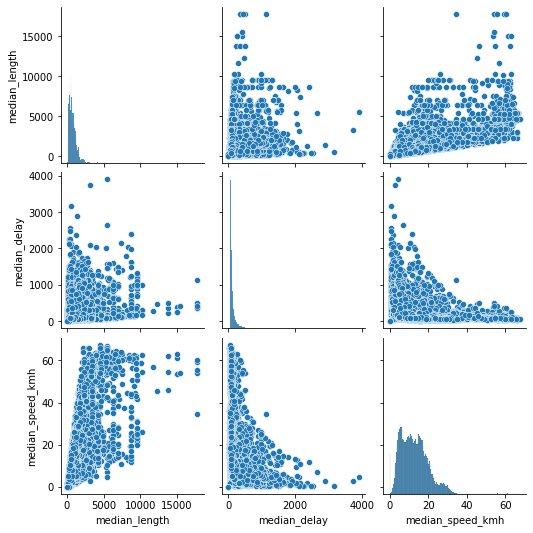

In [423]:
sns.pairplot(df_final[['median_length','median_delay','median_speed_kmh']])

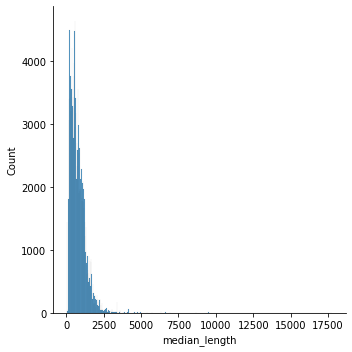

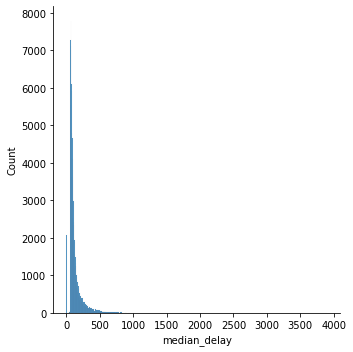

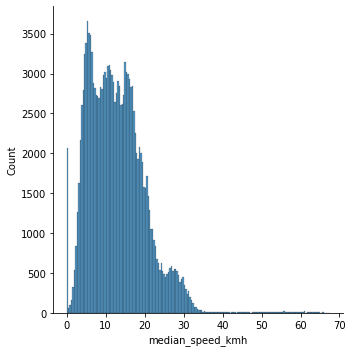

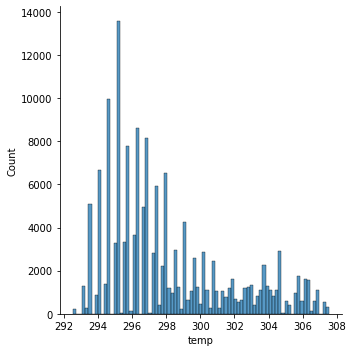

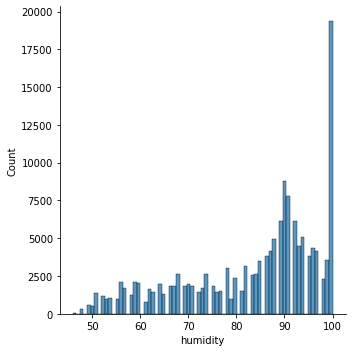

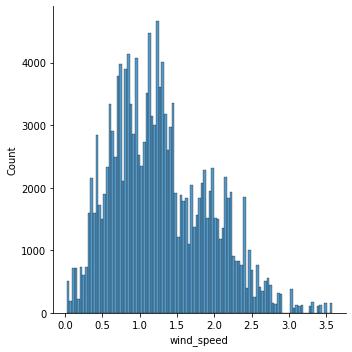

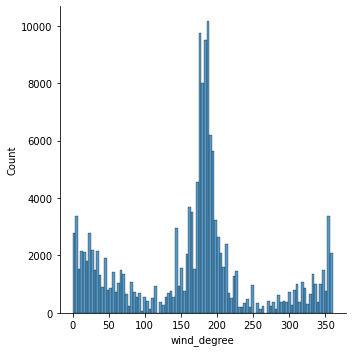

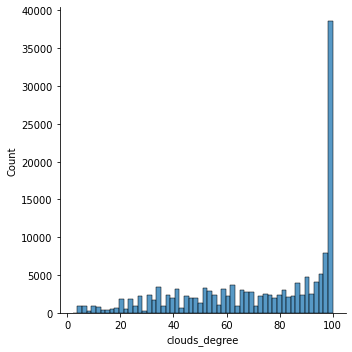

In [424]:
for i in ['median_length','median_delay','median_speed_kmh', 'temp','humidity','wind_speed','wind_degree','clouds_degree']:
    sns.displot(data= df_final, x=i)

Text(0, 0.5, '#Records')

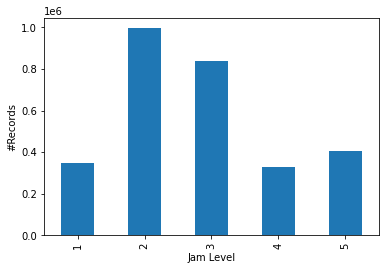

In [425]:
df_final.groupby(['level'])['total_records'].sum().sort_index().plot(kind='bar')
plt.xlabel('Jam Level')
plt.ylabel('#Records')

In [426]:
df_final['level_new'] = df_final['level'].astype(str).replace({'2':'1',
                                                '3':'2',
                                                '4':'3',
                                                '5':'3'}).astype(int)

Text(0, 0.5, '#Records')

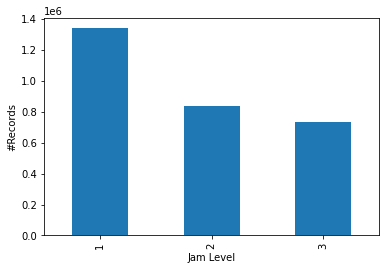

In [427]:
df_final.groupby(['level_new'])['total_records'].sum().sort_index().plot(kind='bar')
plt.xlabel('Jam Level')
plt.ylabel('#Records')

In [428]:
df_final.groupby(['street']).agg({'total_records':np.sum}).sort_values(by='total_records', ascending=False)[0:20]

,total_records
street,
Dewi Sartika,336742
Sawangan Raya,157712
Margonda Raya,120765
N8 Jalan Raya Bogor,102895
Krukut Raya,96994
Tole Iskandar,95842
Cinere Raya,92520
Muhtar Raya,85351
Komjen Pol M Jasin,82948


In [429]:
df_final.groupby(['day_name']).agg({'total_records':np.sum}).sort_values(by='total_records', ascending=False)


,total_records
day_name,
Saturday,499981
Friday,458322
Sunday,422111
Thursday,412879
Wednesday,385499
Monday,374757
Tuesday,359875


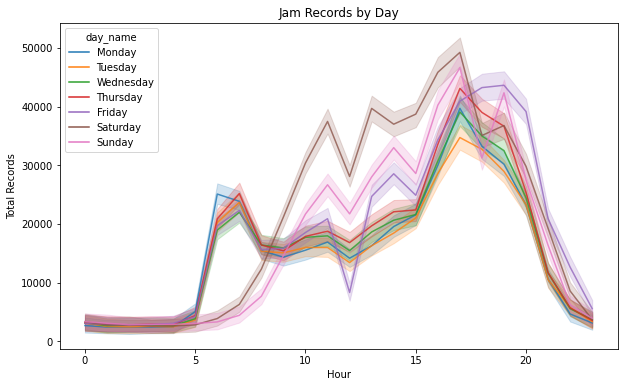

In [430]:
sns.lineplot(data=df_final,
             x = 'hour',
             y = 'total_records',
             estimator=np.sum,
             hue='day_name',
             hue_order=['Monday', 'Tuesday', 'Wednesday',
                        'Thursday', 'Friday', 'Saturday', 'Sunday'],
             alpha = 0.8)
plt.xlabel('Hour')
plt.ylabel('Total Records')
plt.title("Jam Records by Day")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [431]:
df_final['weather'].unique()


array(['Clouds', 'Rain', 'Clear'], dtype=object)

<AxesSubplot:xlabel='weather', ylabel='total_records'>

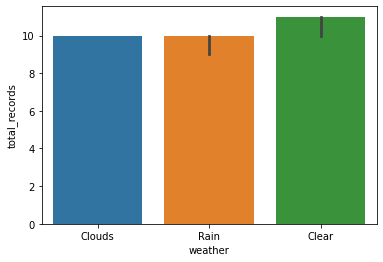

In [432]:
sns.barplot(data=df_final,
             x='weather',
             y='total_records',
             estimator=np.median)


In [433]:
df_model = df_final[['day_name','isweekend','hour_rounded','street', 'median_length', 'median_delay', 
                     'median_speed_kmh','pub_holiday','weather',
                     'temp','humidity','wind_speed','wind_degree','clouds_degree', 'rain_duration',
                     'level_new']].copy()

df_model.sample(2)

,day_name,isweekend,hour_rounded,street,median_length,median_delay,median_speed_kmh,pub_holiday,weather,temp,humidity,wind_speed,wind_degree,clouds_degree,rain_duration,level_new
145503,Friday,0,11,Srengseng Sawah,1092.0,76.5,17.600000,0,Rain,298.40,79,1.00,334,75,0.42,1
139446,Tuesday,0,22,Nusantara,762.0,64.0,18.529999,0,Clouds,294.16,97,1.28,180,89,0.00,1


In [434]:
df_model.loc[df_model['street'].isin(
    (df_model['street'].value_counts()[df_model['street'].value_counts() <= 100]).index), 'street'] = 'Other'

In [435]:

df_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 154459 entries, 0 to 154532
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   day_name          154459 non-null  object 
 1   isweekend         154459 non-null  int64  
 2   hour_rounded      154459 non-null  int64  
 3   street            154459 non-null  object 
 4   median_length     154459 non-null  float64
 5   median_delay      154459 non-null  float64
 6   median_speed_kmh  154459 non-null  float64
 7   pub_holiday       154459 non-null  int64  
 8   weather           154459 non-null  object 
 9   temp              154459 non-null  float64
 10  humidity          154459 non-null  int64  
 11  wind_speed        154459 non-null  float64
 12  wind_degree       154459 non-null  int64  
 13  clouds_degree     154459 non-null  int64  
 14  rain_duration     154459 non-null  float64
 15  level_new         154459 non-null  int64  
dtypes: float64(6), int64

In [436]:
df_model[['day_name','isweekend','street','pub_holiday', 'weather']] = df_model[['day_name','isweekend','street','pub_holiday','weather']].astype('category')


In [437]:
df_model.to_parquet('/content/drive/MyDrive/Mini DS/df_model.parquet')


In [438]:
df_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 154459 entries, 0 to 154532
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   day_name          154459 non-null  category
 1   isweekend         154459 non-null  category
 2   hour_rounded      154459 non-null  int64   
 3   street            154459 non-null  category
 4   median_length     154459 non-null  float64 
 5   median_delay      154459 non-null  float64 
 6   median_speed_kmh  154459 non-null  float64 
 7   pub_holiday       154459 non-null  category
 8   weather           154459 non-null  category
 9   temp              154459 non-null  float64 
 10  humidity          154459 non-null  int64   
 11  wind_speed        154459 non-null  float64 
 12  wind_degree       154459 non-null  int64   
 13  clouds_degree     154459 non-null  int64   
 14  rain_duration     154459 non-null  float64 
 15  level_new         154459 non-null  int64   
dtypes:

<AxesSubplot:>

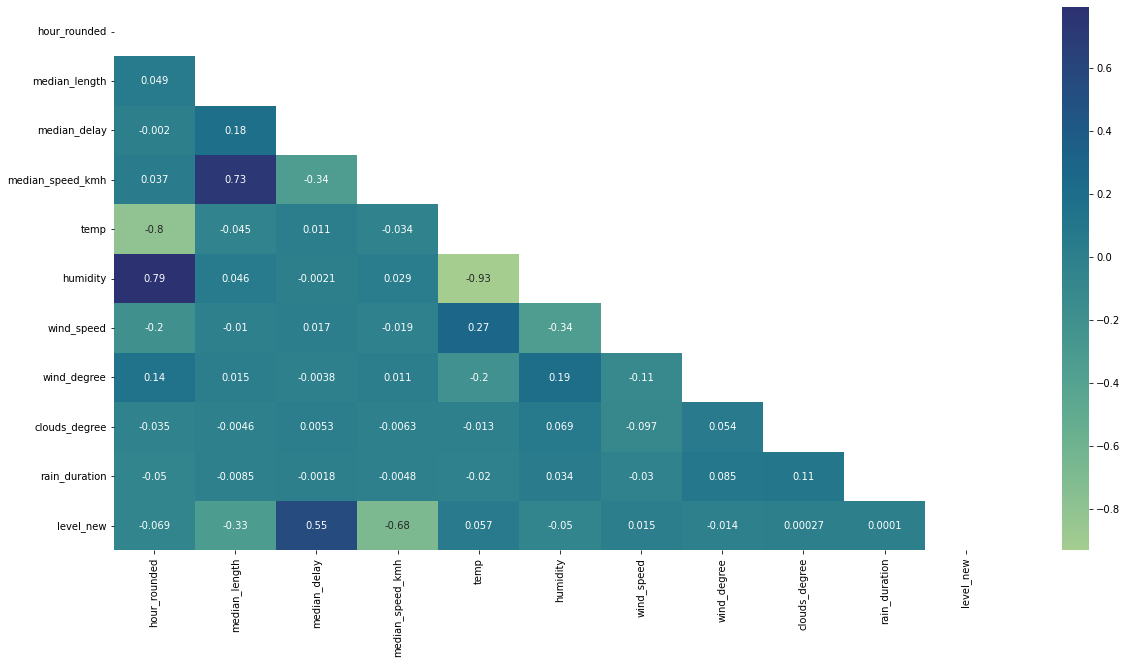

In [439]:
plt.figure(figsize=(20,10))
sns.heatmap(df_model.corr(), annot=True, cmap=sns.color_palette("crest", as_cmap=True),
            mask = np.triu(np.ones_like(df_model.corr())))


MODELLING

In [440]:
X = df_model.drop('level_new', axis=1)
y = df_model['level_new']

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=88, stratify=y)

In [442]:
numeric_columns = X_train.select_dtypes(include=['float','int']).columns.tolist()
ordinal_columns = ['day_name']
categoric_columns = ['isweekend', 'street', 'pub_holiday', 'weather']

In [443]:
scaler = StandardScaler()
ordinal_encoder = OrdinalEncoder()
onehot = OneHotEncoder()

In [444]:
# creating pipeline
num_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])
ordinal_pipeline = Pipeline(steps=[
    ('encode', OrdinalEncoder(handle_unknown='error'))
])
categoric_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='error', sparse=False))
])

In [445]:
# creating column transformer
col_trans = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numeric_columns),
        ('ordinal_pipeline', ordinal_pipeline, ordinal_columns),
        ('categoric_pipeline', categoric_pipeline, categoric_columns)
    ],
    remainder='drop',
    n_jobs=-1
)

In [446]:
logistic_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', n_jobs=-1,
                                  random_state=88)


In [447]:
pipeline_logistic_clf = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', logistic_clf)
])

In [448]:
pipeline_logistic_clf.fit(X_train, y_train)


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['hour_rounded',
                                                   'median_length',
                                                   'median_delay',
                                                   'median_speed_kmh', 'temp',
                                                   'humidity', 'wind_speed',
                                                   'wind_degree',
                                                   'clouds_degree',
                                                   'rain_duration']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(ste

In [449]:
print(classification_report(y_train, pipeline_logistic_clf.predict(X_train)))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95     68647
           2       0.85      0.84      0.84     35662
           3       0.89      0.87      0.88     19258

    accuracy                           0.91    123567
   macro avg       0.89      0.89      0.89    123567
weighted avg       0.91      0.91      0.91    123567



In [450]:
print(classification_report(y_test, pipeline_logistic_clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.94      0.95      0.95     17162
           2       0.85      0.84      0.85      8915
           3       0.88      0.86      0.87      4815

    accuracy                           0.91     30892
   macro avg       0.89      0.89      0.89     30892
weighted avg       0.91      0.91      0.91     30892



random forest classifier

In [451]:
rf_classifier = RandomForestClassifier(random_state=88)

In [452]:
pipeline_rf_clf = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', rf_classifier)
])

In [453]:
pipeline_rf_clf.fit(X_train, y_train)


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['hour_rounded',
                                                   'median_length',
                                                   'median_delay',
                                                   'median_speed_kmh', 'temp',
                                                   'humidity', 'wind_speed',
                                                   'wind_degree',
                                                   'clouds_degree',
                                                   'rain_duration']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(ste

In [454]:
print(classification_report(y_train, pipeline_rf_clf.predict(X_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     68647
           2       1.00      1.00      1.00     35662
           3       1.00      1.00      1.00     19258

    accuracy                           1.00    123567
   macro avg       1.00      1.00      1.00    123567
weighted avg       1.00      1.00      1.00    123567



In [455]:
print(classification_report(y_test, pipeline_rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96     17162
           2       0.89      0.88      0.89      8915
           3       0.92      0.90      0.91      4815

    accuracy                           0.93     30892
   macro avg       0.92      0.92      0.92     30892
weighted avg       0.93      0.93      0.93     30892



decision tree classifier

In [456]:
dt_classifier = DecisionTreeClassifier(random_state=88)


In [457]:
pipeline_dt_clf = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', dt_classifier)
])

In [458]:
pipeline_dt_clf.fit(X_train, y_train)


In [459]:
print(classification_report(y_train, pipeline_dt_clf.predict(X_train)))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     68647
           2       1.00      1.00      1.00     35662
           3       1.00      1.00      1.00     19258

    accuracy                           1.00    123567
   macro avg       1.00      1.00      1.00    123567
weighted avg       1.00      1.00      1.00    123567



In [460]:
print(classification_report(y_test, pipeline_dt_clf.predict(X_test)))


              precision    recall  f1-score   support

           1       0.95      0.95      0.95     17162
           2       0.87      0.87      0.87      8915
           3       0.89      0.90      0.90      4815

    accuracy                           0.92     30892
   macro avg       0.90      0.91      0.91     30892
weighted avg       0.92      0.92      0.92     30892



support vector classifier

In [462]:
svc = SVC(random_state=88)


In [463]:
pipeline_svc = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', svc)
])

In [464]:
pipeline_svc.fit(X_train, y_train)


Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['hour_rounded',
                                                   'median_length',
                                                   'median_delay',
                                                   'median_speed_kmh', 'temp',
                                                   'humidity', 'wind_speed',
                                                   'wind_degree',
                                                   'clouds_degree',
                                                   'rain_duration']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(ste

In [465]:
print(classification_report(y_test, pipeline_dt_clf.predict(X_test)))


              precision    recall  f1-score   support

           1       0.95      0.95      0.95     17162
           2       0.87      0.87      0.87      8915
           3       0.89      0.90      0.90      4815

    accuracy                           0.92     30892
   macro avg       0.90      0.91      0.91     30892
weighted avg       0.92      0.92      0.92     30892



In [466]:
print(classification_report(y_train, pipeline_dt_clf.predict(X_train)))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     68647
           2       1.00      1.00      1.00     35662
           3       1.00      1.00      1.00     19258

    accuracy                           1.00    123567
   macro avg       1.00      1.00      1.00    123567
weighted avg       1.00      1.00      1.00    123567



hyper parameter tuning for selected model

In [468]:
# add parameter tuning into pipeline

grid_params = {'model__penalty':['none', 'l2'],
               'model__solver':['saga', 'newton-cg']}

In [469]:
final_pipeline = RandomizedSearchCV(pipeline_logistic_clf, grid_params, scoring='f1_weighted',
                                    cv = 5, n_iter=4, n_jobs=-1)

In [ ]:
final_pipeline.fit(X_train, y_train)

In [ ]:
final_pipeline.best_score_


In [ ]:
final_pipeline.best_params_


In [ ]:
print(classification_report(y_test, final_pipeline.predict(X_test)))


In [ ]:
print(classification_report(y_train, final_pipeline.predict(X_train)))


In [ ]:
final_pipeline.best_estimator_


In [ ]:
final_pipeline.best_params_

In [ ]:
joblib.dump(final_pipeline.best_estimator_, '/content/drive/MyDrive/Mini DS/logistic_clf.pkl')
